In [112]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

## 基本框架
![title](pic/Snipaste_2020-07-28_11-00-40.jpg)


In [113]:
# Prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]]) 
y_data = torch.Tensor([[0], [0], [1]])

In [114]:
# Design model using Class nherit from nn.Module
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1) 
        # Class nn.Linear has implemented the magic method __call__(), 
        # which enable the instance of the class can be called just like a function.
    def forward(self, x):
        # sigmoid函数没有额外的参数，不需要训练，只需要在每次predict的时候直接掉用就行了
        y_pred = F.sigmoid(self.linear(x))  # Normally the forward() will be called.
        return y_pred

In [115]:
model = LogisticRegressionModel() # 实例化一个callable对象

In [116]:
# Construct loss and optimizer using PyTorch API
criterion = torch.nn.BCELoss(size_average=False) # Logistic Regression使用BCE作为损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

/home/mastlabzl/Programs/miniconda3/envs/PyTorch/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [117]:
# 保存到list方便作图
epoch_list = []
loss_list = []

In [118]:
# Training cycle
for epoch in range(100):
    epoch_list.append(epoch)
    # forward
    y_pred = model(x_data) # 实际上调用的是LinearModel.forward()函数
    loss = criterion(y_pred, y_data) 
    loss_list.append(loss.item())
    print(epoch, loss.item())
    # 在backward前将权重清零
    optimizer.zero_grad() 
    # backward
    loss.backward() 
    # update
    optimizer.step()
print('w = ', model.linear.weight.item()) 
print('b = ', model.linear.bias.item())

0 2.7577226161956787
1 2.5130226612091064
2 2.326585054397583
3 2.1901116371154785
4 2.093143939971924
5 2.025336742401123
6 1.9779372215270996
7 1.9442873001098633
8 1.9196698665618896
9 1.9008970260620117
10 1.8858758211135864
11 1.8732571601867676
12 1.8621814250946045
13 1.852104902267456
14 1.8426830768585205
15 1.833700180053711
16 1.8250195980072021
17 1.8165560960769653
18 1.8082547187805176
19 1.8000813722610474
20 1.7920143604278564
21 1.7840396165847778
22 1.7761482000350952
23 1.7683340311050415
24 1.7605934143066406
25 1.7529230117797852
26 1.74532151222229
27 1.7377872467041016
28 1.730318307876587
29 1.7229149341583252
30 1.7155752182006836
31 1.708298921585083
32 1.7010849714279175
33 1.6939330101013184
34 1.6868419647216797
35 1.6798115968704224
36 1.67284095287323
37 1.6659296751022339
38 1.6590766906738281
39 1.6522822380065918
40 1.645544409751892
41 1.6388638019561768
42 1.6322392225265503
43 1.6256701946258545
44 1.6191561222076416
45 1.612696647644043
46 1.606290

/home/mastlabzl/Programs/miniconda3/envs/PyTorch/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [119]:
x_test = torch.Tensor([[4.0]])
y_test = model(x_test) 
print('y_pred = ', y_test.item())

y_pred =  0.7650259733200073


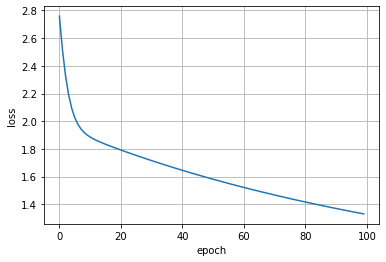

In [120]:
# plot
plt.plot(epoch_list, loss_list) 
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.grid() 
plt.show()

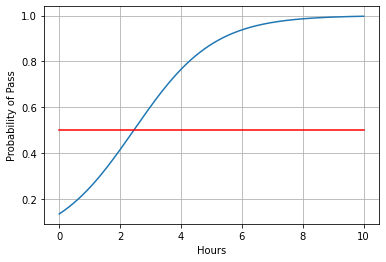

In [121]:
x = np.linspace(0, 10, 200) # 在【0，10】之间采样200个点
x_t = torch.Tensor(x).view((200, 1)) # 将x变为200行1列的tensor
y_t = model(x_t) # 送入模型预测
y = y_t.data.numpy() # 调用.numpy()得到numpy数组
plt.plot(x, y) # 绘图
plt.plot([0, 10], [0.5, 0.5], c='r') # 加参考线
plt.xlabel('Hours') 
plt.ylabel('Probability of Pass') 
plt.grid() 
plt.show()